#### Objetivo
Traçar uma linha que aproximem os valores dos elementos, minimizando a distância vertical dos pontos até a linha 
Algoritmo Supervisionado

##### Métodos:
Mínimos quadrados: procura obter a curva que resulte na menor soma das distâncias de todos os pontos até ela

Soma dos erros brutos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
uh = pd.read_csv("USA_Housing.csv")

In [5]:
uh.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
uh.columns = ['renda media regiao', 'idade media casa', "qtd media quartos", "qtd media banheiros", "populacao media area", "preco", "endereco"]
uh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
renda media regiao      5000 non-null float64
idade media casa        5000 non-null float64
qtd media quartos       5000 non-null float64
qtd media banheiros     5000 non-null float64
populacao media area    5000 non-null float64
preco                   5000 non-null float64
endereco                5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


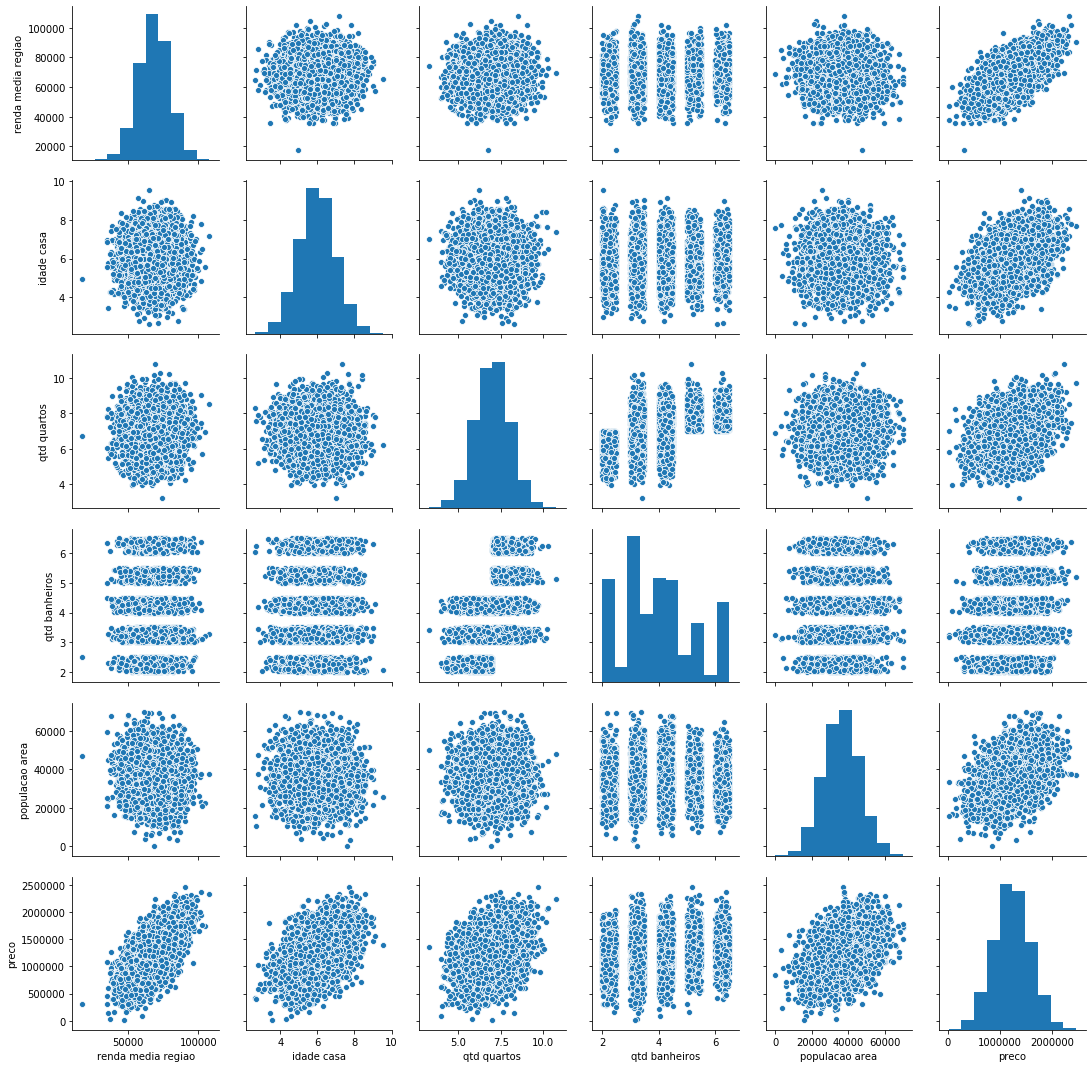

In [11]:
sns.pairplot(uh)

Em uma análise simplista, podemos observar que a variável de preço tende a ter uma relação linear com a renda, idade da casa, qtd quartos e a populacao da area

In [14]:
#computar a realação em pares das colunas, eliminando NaNs e valores nulos
uh.corr()

,renda media regiao,idade media casa,qtd media quartos,qtd media banheiros,populacao media area,preco
renda media regiao,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
idade media casa,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
qtd media quartos,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
qtd media banheiros,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
populacao media area,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
preco,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


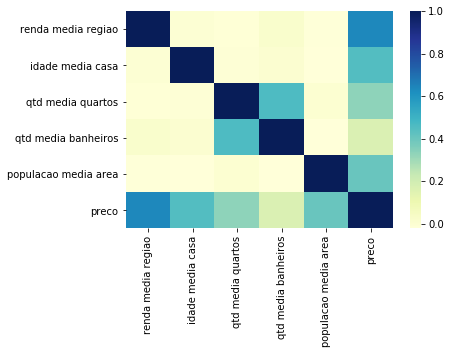

In [17]:
sns.heatmap(uh.corr(), cmap="YlGnBu")

In [21]:
#fatores que serão usados na predição
x = uh[['renda media regiao', 'idade media casa', "qtd media quartos", "qtd media banheiros", "populacao media area"]]

#fator a ser predito
y = uh[['preco']]

In [23]:
#biblioteca utilizada para auxiliar a na separacao dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [26]:
#tuple unpacking
x_a, x_t, y_a, y_t = train_test_split(x, y, test_size=0.3)

In [30]:
#biblioteca de regressao linear
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

lr.fit(x_a, y_a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#por onde o eixo y é cruzado
print(lr.intercept_)

[-2630423.77416005]


In [51]:
coefs = pd.DataFrame(lr.coef_.T, [x_a.columns], columns=["coefs"])

In [53]:
coefs

,coefs
renda media regiao,21.527217
idade media casa,167214.521907
qtd media quartos,117974.877657
qtd media banheiros,2619.917110
populacao media area,15.221515


O coeficiente  indica o quanto o valor final (preço da casa) vai variar de acordo com o acrecimo de cada unidade de medida de cada coluna

In [54]:
predicao = lr.predict(x_t)

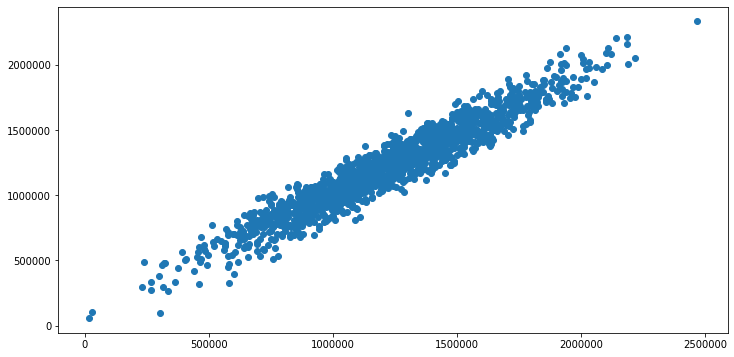

In [59]:
#Plotar a dispercao da predicao com o real
plt.figure(figsize=(12,6))
plt.scatter(y_t, predicao)

Podemos observar que o o modelo conseguiu valores próximos dos reais, caso o modelo fosse perfeito uma linha reta teria sido traçada.

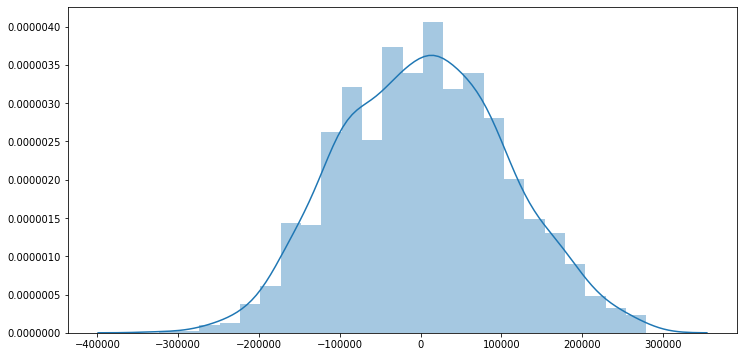

In [66]:
#Função que combina a funcao de histograma com a funcao de estimativa de densidade
plt.figure(figsize=(12,6))
sns.distplot((y_t-predicao))

Agora vemos que a taxa de erro fica bem próxima de 0 (y), e que a distribuiçao do gráfico se aproxima de um distribuição normal, mostrando a eficácia da escolha do modelo.

In [67]:
# importacao da biblioteca de metricas de avaliacao
from sklearn import metrics

In [69]:
print("MAE, erro absoluto médio:", metrics.mean_absolute_error(y_t,predicao))

MAE, erro absoluto médio: 82912.87046159984


A média do erro de quando o modelo erra é de 82,900 dólares

In [70]:
print("MSE, erro médio quadrado:", metrics.mean_squared_error(y_t, predicao))

MSE, erro médio quadrado: 10422126210.924147


Valor dificíl de se interpretar, VARIÂNCIA do erro

In [72]:
print("RMSE, raiz erro médio quadrado:", np.sqrt(metrics.mean_squared_error(y_t, predicao)))

RMSE, raiz erro médio quadrado: 102088.81530767289


A raiz da VARIÂNCIA, DESVIO PADRÃO